# **Project M4**

# Load the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

bob_ross = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2023/2023-02-21/bob_ross.csv')

In [2]:
bob_ross.head()

,painting_index,img_src,painting_title,season,episode,num_colors,youtube_src,colors,color_hex,Black_Gesso,...,Liquid_Clear,Midnight_Black,Phthalo_Blue,Phthalo_Green,Prussian_Blue,Sap_Green,Titanium_White,Van_Dyke_Brown,Yellow_Ochre,Alizarin_Crimson
0,282,https://www.twoinchbrush.com/images/painting28...,A Walk in the Woods,1,1,8,https://www.youtube.com/embed/oh5p5f5_-7A,"['Alizarin Crimson', 'Bright Red', 'Cadmium Ye...","['#4E1500', '#DB0000', '#FFEC00', '#102E3C', '...",False,...,False,False,False,True,True,True,True,True,False,True
1,283,https://www.twoinchbrush.com/images/painting28...,Mt. McKinley,1,2,8,https://www.youtube.com/embed/RInDWhYceLU,"['Alizarin Crimson', 'Bright Red', 'Cadmium Ye...","['#4E1500', '#DB0000', '#FFEC00', '#102E3C', '...",False,...,False,False,False,True,True,True,True,True,False,True
2,284,https://www.twoinchbrush.com/images/painting28...,Ebony Sunset,1,3,9,https://www.youtube.com/embed/UOziR7PoVco,"['Alizarin Crimson', 'Black Gesso', 'Bright Re...","['#4E1500', '#000000', '#DB0000', '#FFEC00', '...",True,...,False,False,False,True,True,True,True,True,False,True
3,285,https://www.twoinchbrush.com/images/painting28...,Winter Mist,1,4,3,https://www.youtube.com/embed/0pwoixRikn4,"['Prussian Blue', 'Titanium White', 'Van Dyke ...","['#021E44', '#FFFFFF', '#221B15']",False,...,False,False,False,False,True,False,True,True,False,False
4,286,https://www.twoinchbrush.com/images/painting28...,Quiet Stream,1,5,8,https://www.youtube.com/embed/DFSIQNjKRfk,"['Alizarin Crimson', 'Bright Red', 'Cadmium Ye...","['#4E1500', '#DB0000', '#FFEC00', '#102E3C', '...",False,...,False,False,False,True,True,True,True,True,False,True


In [3]:
bob_ross.shape, bob_ross.columns[:15]

((403, 27),
 Index(['painting_index', 'img_src', 'painting_title', 'season', 'episode',
        'num_colors', 'youtube_src', 'colors', 'color_hex', 'Black_Gesso',
        'Bright_Red', 'Burnt_Umber', 'Cadmium_Yellow', 'Dark_Sienna',
        'Indian_Red'],
       dtype='object'))

In [4]:
bob_ross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   painting_index    403 non-null    int64 
 1   img_src           403 non-null    object
 2   painting_title    403 non-null    object
 3   season            403 non-null    int64 
 4   episode           403 non-null    int64 
 5   num_colors        403 non-null    int64 
 6   youtube_src       403 non-null    object
 7   colors            403 non-null    object
 8   color_hex         403 non-null    object
 9   Black_Gesso       403 non-null    bool  
 10  Bright_Red        403 non-null    bool  
 11  Burnt_Umber       403 non-null    bool  
 12  Cadmium_Yellow    403 non-null    bool  
 13  Dark_Sienna       403 non-null    bool  
 14  Indian_Red        403 non-null    bool  
 15  Indian_Yellow     403 non-null    bool  
 16  Liquid_Black      403 non-null    bool  
 17  Liquid_Clear    

# EDA

## EDA 1: Overall structure exploration - what is the distribution of color usage?

The initial structural analysis examines the usage of all colors in Bob Ross's paintings, aiming to determine whether there exists a discernible variation in color frequency when no other conditions are applied.

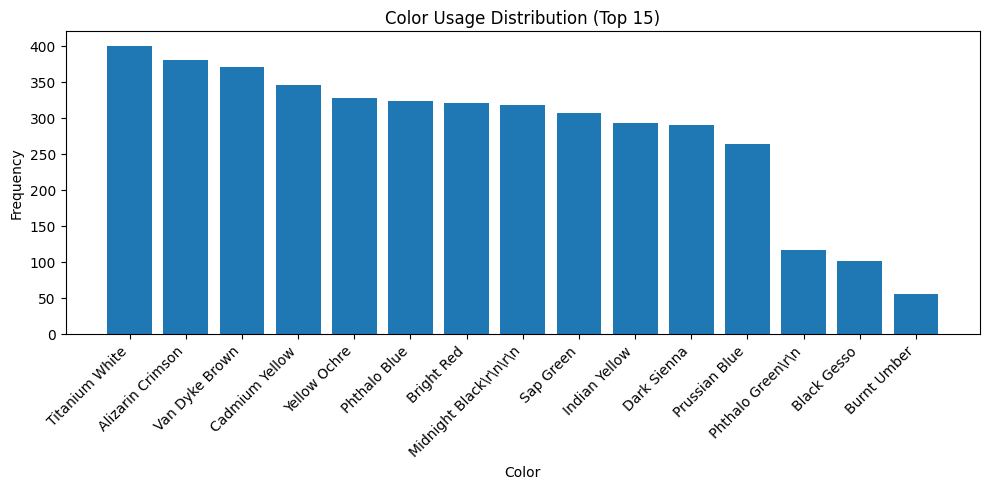

In [5]:
# Some color labels include non-standard characters, but each color appears consistently with the same label, so the frequency counts  are not affected by duplicate representations.
colors_exploded = (
    bob_ross["colors"]
    .astype(str)
    .str.strip("[]")
    .str.replace("'", "", regex=False)
    .str.split(",")
    .explode()
    .str.strip() # remove spaces
)

color_counts = colors_exploded.value_counts()
top_n = 15
top_colors = color_counts.head(top_n)

plt.figure(figsize=(10, 5))
plt.bar(top_colors.index, top_colors.values)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Frequency")
plt.xlabel("Color")
plt.title("Color Usage Distribution (Top 15)")
plt.tight_layout()
plt.show()

Summary: Titanium White appears in about 400 out of 403 paintings, followed by Alizarin Crimson and Van Dyke Brown (each used in over 90% of paintings), while most other colors drop sharply in frequency, indicating a small, stable core palette with a long tail of auxiliary colors.

## EDA 2: Distribution of Color Usage Across Paintings

### 2.1 Are there clear differences in usage frequency across colors?

This EDA analyzes the frequency with which individual colors appear across paintings to distinguish core palette colors from more variable stylistic choices. By examining binary color usage indicators, we gain an initial understanding of the structural foundations of Bob Ross’s visual style.

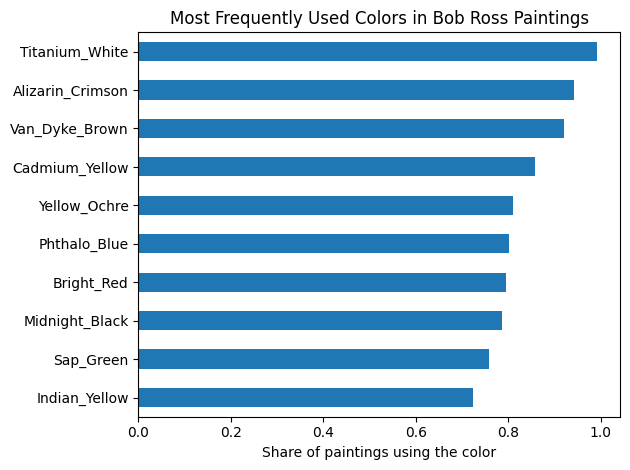

In [6]:
# Select all binary color indicator columns
color_cols = bob_ross.select_dtypes("bool").columns

# Compute the proportion of paintings that use each color
color_freq = bob_ross[color_cols].mean().sort_values(ascending=False)
color_freq.head(10)

# Visualize the top 10 most frequently used colors
plt.figure()
color_freq.head(10).sort_values().plot(kind="barh")
plt.xlabel("Share of paintings using the color")
plt.title("Most Frequently Used Colors in Bob Ross Paintings")
plt.tight_layout()
plt.show()

Summary: The results indicate that Bob Ross relies heavily on a small group of core colors, while other colors are used more selectively. This pattern suggests a consistent underlying palette with limited variation around it.

### 2.2 How many colors are usually used in paintings?

This analysis focuses on understanding how much visual complexity Bob Ross typically employs in a single painting, measured by the number of unique colors used. By examining the distribution of palette complexity, the goal is to assess whether most paintings follow a consistent level of complexity or whether there are distinct groups ranging from minimal to highly complex palettes.

In [7]:
bob_ross["num_colors"].describe()

,num_colors
count,403.000000
mean,10.605459
std,2.378525
min,1.000000
25%,9.000000
50%,11.000000
75%,12.000000
max,15.000000


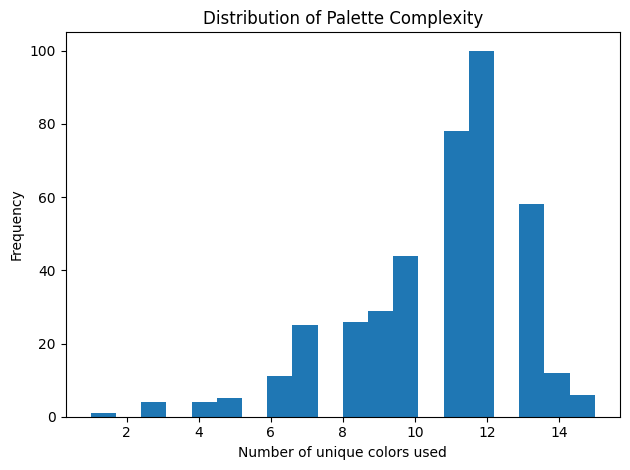

In [8]:
# Visualize how many unique colors are typically used in a painting
plt.figure()
bob_ross["num_colors"].plot(kind="hist", bins=20)
plt.xlabel("Number of unique colors used")
plt.title("Distribution of Palette Complexity")
plt.tight_layout()
plt.show()

Summary: Most paintings use around 10-12 unique colors, with very few works using extremely small or very large palettes. This narrow concentration suggests that Bob Ross generally maintains a consistent level of palette complexity, with only occasional deviations.

## EDA 3: Explore the usage relationships among colors

### 3.1 Co-occurrence Patterns Among Frequently Used Colors

This analysis examines how colors tend to appear together in Bob Ross paintings, rather than in isolation. By studying color co-occurrence patterns, the goal is to understand whether Bob Ross relied on stable, recurring color combinations that define his visual style, or whether palettes varied freely across paintings. Identifying consistent color pairings helps reveal implicit design rules behind the artwork - such as base colors that anchor compositions and accent colors that are selectively combined. This provides insight into the structure of artistic decision-making and helps distinguish intentional stylistic patterns from random color usage.

In [9]:
# Compute a color co-occurrence matrix showing how often pairs of colors appear together in the same painting
top10_cols = color_freq.head(10).index
color_matrix = bob_ross[top10_cols].astype(int)
cooccur = color_matrix.T.dot(color_matrix)

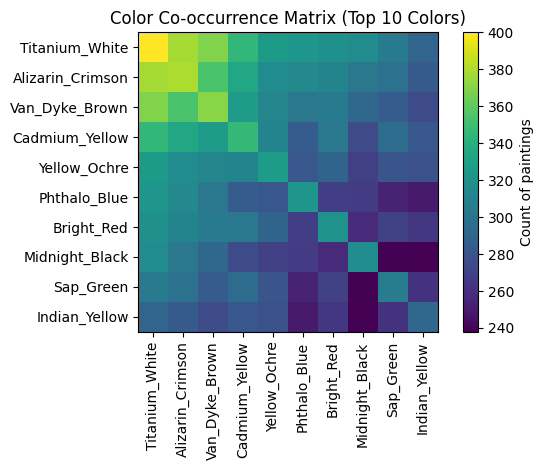

In [10]:
# Visualize the color co-occurrence matrix to identify frequently paired colors across paintings
plt.figure()
plt.imshow(cooccur.values)
plt.xticks(range(len(top10_cols)), top10_cols, rotation=90)
plt.yticks(range(len(top10_cols)), top10_cols)
plt.title("Color Co-occurrence Matrix (Top 10 Colors)")
plt.colorbar(label="Count of paintings")
plt.tight_layout()
plt.show()

Summary: The co-occurrence matrix reveals clear relationships among core colors, with certain colors - such as Titanium White, Alizarin Crimson, and Van Dyke Brown - frequently appearing together. This indicates that color usage is structured, with stable combinations rather than independent or random selection.

## EDA 4: The influence of time on creation

### 4.1 Does the distribution of palette size differ across seasons, or does it remain stable over time?

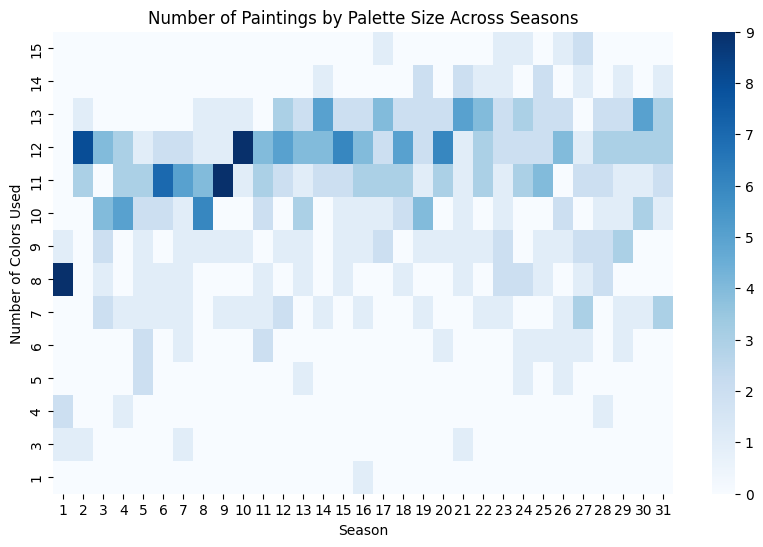

In [11]:
import seaborn as sns

# Count the number of paintings for each combination of season and palette size (number of colors used)
count_table = (
    bob_ross
    .groupby(["season", "num_colors"])
    .size()
    .reset_index(name="num_paintings")
)

# Pivot the table into a matrix
heatmap_data = count_table.pivot(
    index="num_colors",
    columns="season",
    values="num_paintings"
).fillna(0)

# Sort palette size from smallest to largest for easier interpretation
heatmap_data = heatmap_data.sort_index(ascending=False)

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap="Blues")
plt.xlabel("Season")
plt.ylabel("Number of Colors Used")
plt.title("Number of Paintings by Palette Size Across Seasons")
plt.show()

The heatmap shows that the distribution of palette size is highly consistent across seasons. Across all seasons, most paintings consistently use about 10-13 colors, with very few paintings using fewer than 6 or more than 15 colors. This stable distribution across seasons suggests that palette size is not strongly influenced by season.

### 4.2 Do Bob Ross’s color usage patterns change across seasons?

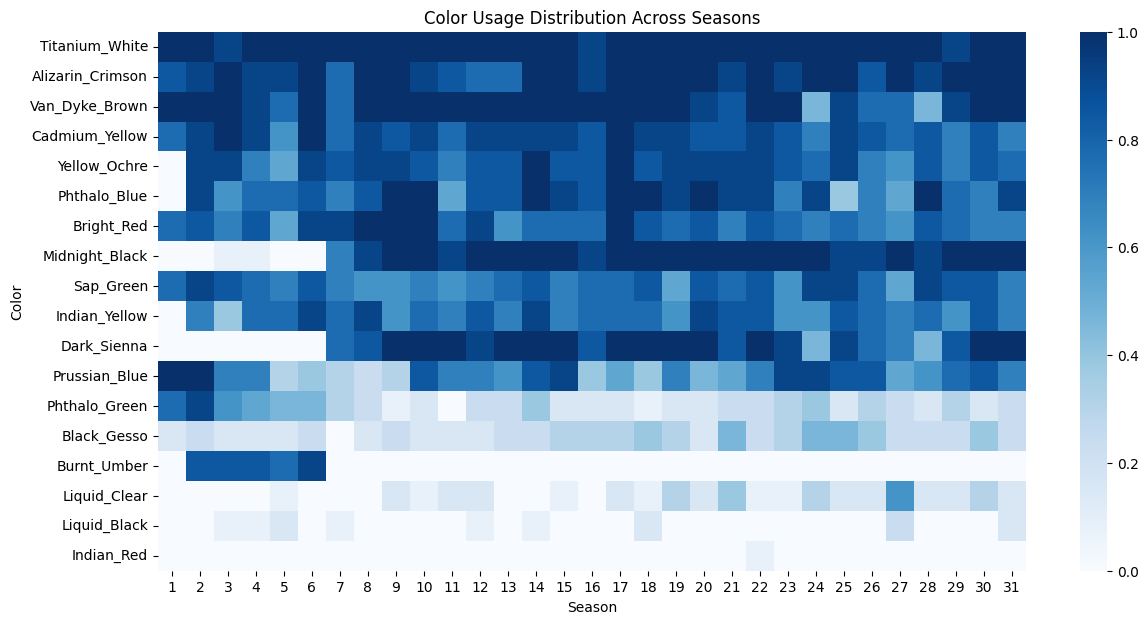

In [12]:
# Select all binary color indicator columns
color_cols = bob_ross.select_dtypes("bool").columns

# Compute the proportion of paintings using each color in each season
season_color_rate = bob_ross.groupby("season")[color_cols].mean()

# Order colors by their overall usage frequency
color_order = bob_ross[color_cols].mean().sort_values(ascending=False).index
season_color_rate = season_color_rate[color_order]

heatmap_data = season_color_rate.T

# Plot the heatmap
plt.figure(figsize=(14, 7))
sns.heatmap(heatmap_data, cmap="Blues")
plt.xlabel("Season")
plt.ylabel("Color")
plt.title("Color Usage Distribution Across Seasons")
plt.show()

The heatmap shows that color usage is largely stable across seasons, with a small set of core colors dominating throughout the series. At the same time, starting around Season 7, the use of Burnt Umber declines, while Dark Sienna and Midnight Black become more prominent, indicating a subtle substitution among darker tones.

## Unsupervised and Unstructured Analysis

### Section 1 - Method Upgrade: Jaccard + Hierarchical

#### Step 1: Select Top-N most frequently used colors

In [13]:
# Select all binary color indicator columns
color_cols = bob_ross.select_dtypes("bool").columns

# Convert boolean values to integers
X_full = bob_ross[color_cols].astype(int)

# Compute overall usage frequency for each color
color_freq = X_full.mean().sort_values(ascending=False)

# Select the top N most frequently used colors
topN = 10
top_colors = color_freq.head(topN).index
X_topN = X_full[top_colors]

#### Step 2: Jaccard distance matrix & Dendrogram

/tmp/ipython-input-2951883064.py:6: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(D, method='average')


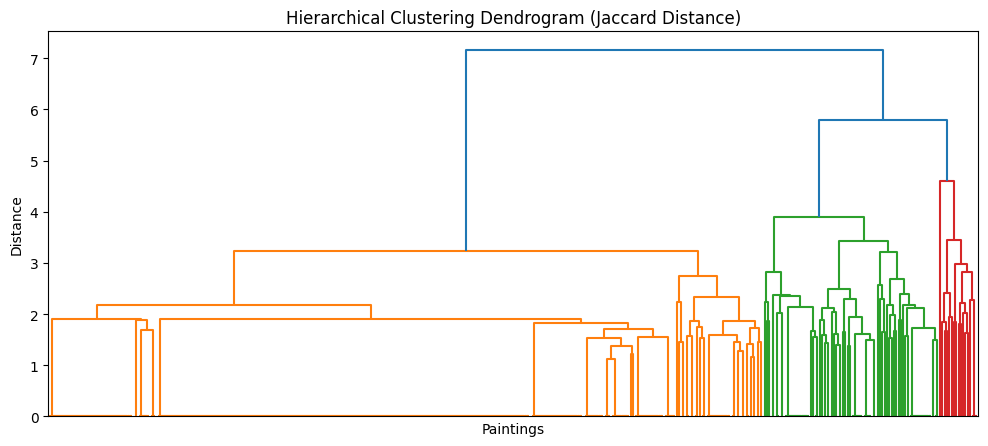

In [14]:
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

X_bool = X_topN.astype(bool).values
D = pairwise_distances(X_bool, metric="jaccard")
Z = linkage(D, method='average')

plt.figure(figsize=(12, 5))
dendrogram(Z, no_labels=True)
plt.title("Hierarchical Clustering Dendrogram (Jaccard Distance)")
plt.xlabel("Paintings")
plt.ylabel("Distance")
plt.show()

### Step 3: Explore different numbers of clusters

In [15]:
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score

k_values = range(2, 9)
scores = []

for k in k_values:
    labels = fcluster(Z, k, criterion='maxclust')
    score = silhouette_score(D, labels, metric="precomputed")
    scores.append(score)

import pandas as pd
pd.DataFrame({"k": k_values, "silhouette_jaccard": scores})

,k,silhouette_jaccard
0,2,0.574450
1,3,0.563110
2,4,0.561517
3,5,0.544942
4,6,0.547533
5,7,0.534967
6,8,0.460152


In [16]:
k = 3

clusters = fcluster(Z, k, criterion='maxclust')
bob_ross['cluster'] = clusters

# Check cluster sizes
bob_ross["cluster"].value_counts()

,count
cluster,
1,310
2,76
3,17


In [17]:
k = 4

clusters = fcluster(Z, k, criterion='maxclust')
bob_ross['cluster'] = clusters

# Check cluster sizes
bob_ross["cluster"].value_counts()

,count
cluster,
1,310
2,76
3,16
4,1


The silhouette scores under Jaccard distance show that k = 2 has the highest value (0.574), followed closely by k = 3 (0.563). Although k = 2 slightly outperforms k = 3 numerically, the difference is small. Choosing k = 2 would oversimplify the structure, which does not capture meaningful stylistic variation.

When k = 4, cluster sizes become extremely imbalanced (one cluster contains only 1 painting). In contrast, k = 3 produces reasonably balanced clusters (310, 76, 17) and maintains a strong silhouette score.

Therefore, k = 3 is selected to maintain a better balance between cluster quality and interpretability.

#### Step 4: Hierarchical clustering

In [18]:
k_final = 3

clusters = fcluster(Z, k_final, criterion='maxclust')
bob_ross['cluster'] = clusters

# Check cluster sizes
bob_ross["cluster"].value_counts()

,count
cluster,
1,310
2,76
3,17


### Step 4: Inspect cluster-level color usage patterns

In [19]:
cluster_profiles = X_topN.groupby(bob_ross['cluster']).mean()

for c in sorted(cluster_profiles.index):
    print(f"\nTop colors in Cluster {c}:")
    print(cluster_profiles.loc[c].sort_values(ascending=False).head(8))


Top colors in Cluster 1:
Titanium_White      1.000000
Yellow_Ochre        0.987097
Alizarin_Crimson    0.983871
Cadmium_Yellow      0.980645
Van_Dyke_Brown      0.958065
Bright_Red          0.929032
Phthalo_Blue        0.893548
Sap_Green           0.893548
Name: 1, dtype: float64

Top colors in Cluster 2:
Titanium_White      0.986842
Alizarin_Crimson    0.934211
Van_Dyke_Brown      0.868421
Midnight_Black      0.657895
Phthalo_Blue        0.565789
Cadmium_Yellow      0.526316
Bright_Red          0.368421
Sap_Green           0.355263
Name: 2, dtype: float64

Top colors in Cluster 3:
Titanium_White      0.882353
Van_Dyke_Brown      0.470588
Midnight_Black      0.470588
Bright_Red          0.294118
Alizarin_Crimson    0.235294
Phthalo_Blue        0.176471
Sap_Green           0.117647
Cadmium_Yellow      0.117647
Name: 3, dtype: float64


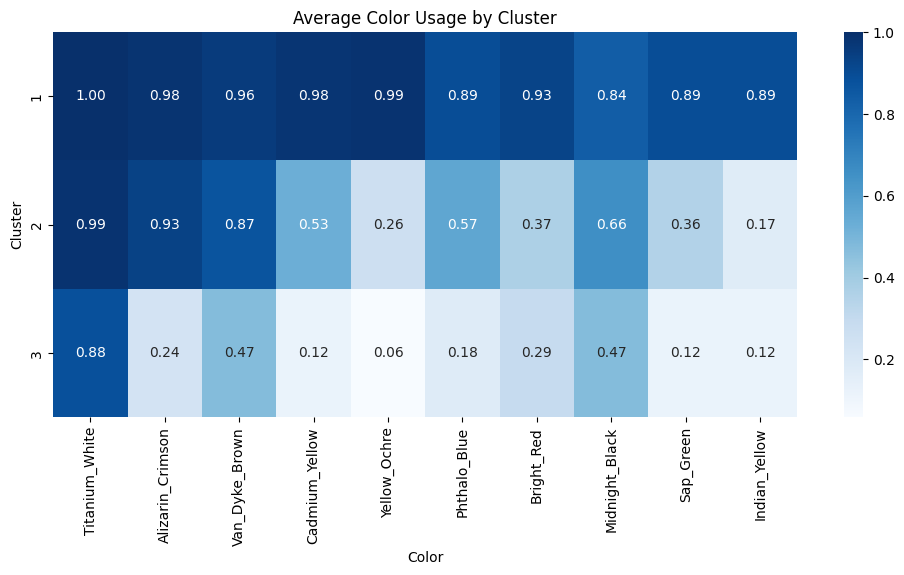

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

sns.heatmap(
    cluster_profiles,
    cmap="Blues",
    annot=True,
    fmt=".2f"
)

plt.title("Average Color Usage by Cluster")
plt.xlabel("Color")
plt.ylabel("Cluster")
plt.show()

**Interpretation**

The heatmap shows three clearly differentiated style groups.

Cluster 1 (largest group) displays very high usage across nearly all core colors. Titanium White, Alizarin Crimson, Cadmium Yellow, and Yellow Ochre are almost universal. This cluster represents the dominant, balanced Bob Ross style, built on a rich and consistent core palette.

Cluster 2 still uses Titanium White heavily but shows noticeably lower usage of Yellow Ochre, Bright Red, Sap Green, and Indian Yellow. This suggests a moderately simplified palette, with reduced emphasis on warm and secondary tones.

Cluster 3 (smallest group) has much lower usage across many core colors except Titanium White. Dark and warm tones are used less frequently, and the overall palette is more restrained. This cluster reflects a lighter or simplified style variation.

Overall, the results reinforce that Bob Ross's work is highly consistent at the core level (especially Titanium White), while meaningful variation arises from how strongly secondary and darker colors are used.

### Section 2 - Outlier Detection

#### Step 1: Compute within-cluster average distance

In [21]:
# Compute within-cluster average distance

outlier_scores = []

for i in range(len(clusters)):
    same_cluster_idx = np.where(clusters == clusters[i])[0]
    same_cluster_idx = same_cluster_idx[same_cluster_idx != i]

    # Compute average distance to other paintings in the cluster
    if len(same_cluster_idx) > 0:
        avg_dist = D[i, same_cluster_idx].mean()
    else:
        avg_dist = 0.0

    outlier_scores.append(avg_dist)

bob_ross["avg_cluster_distance"] = outlier_scores

#### Step 2: Flag outliers (Top 5%)

In [22]:
threshold = np.percentile(bob_ross["avg_cluster_distance"], 95)
bob_ross["is_outlier"] = bob_ross["avg_cluster_distance"] > threshold
outliers = bob_ross[bob_ross["is_outlier"]]

#### Step 3: Inspect the outliers

In [23]:
#  Outlier distribution across clusters

outliers["cluster"].value_counts(normalize=True).rename("proportion")

,proportion
cluster,
3,0.761905
2,0.238095


In [24]:
# Outlier rate and number in each cluster
summary = bob_ross.groupby("cluster").agg(
    total_paintings=("cluster", "size"),
    outlier_count=("is_outlier", "sum")
)

summary["outlier_rate"] = summary["outlier_count"] / summary["total_paintings"]

summary

,total_paintings,outlier_count,outlier_rate
cluster,,,
1,310,0,0.000000
2,76,5,0.065789
3,17,16,0.941176


#### Step 4: Compare color usage: Outliers vs Non-outliers

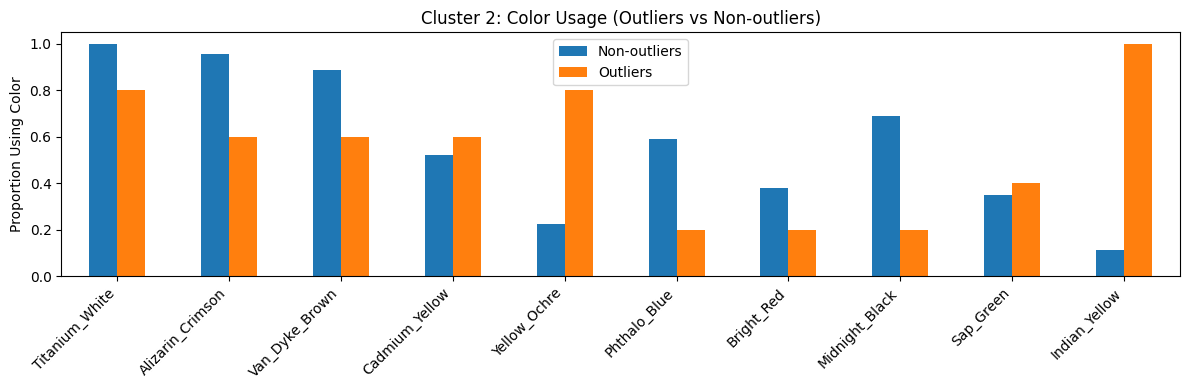

In [25]:
cluster2 = bob_ross["cluster"] == 2

cluster2_out = X_topN[cluster2 & bob_ross["is_outlier"]]
cluster2_non = X_topN[cluster2 & ~bob_ross["is_outlier"]]

# Compute mean usage
cluster2_compare = pd.DataFrame({
    "Non-outliers": cluster2_non.mean(),
    "Outliers": cluster2_out.mean()
})

# Plot
cluster2_compare.plot(
    kind="bar",
    figsize=(12,4),
    color=["tab:blue", "tab:orange"]
)

plt.title("Cluster 2: Color Usage (Outliers vs Non-outliers)")
plt.ylabel("Proportion Using Color")
plt.xticks(rotation=45, ha="right")
plt.grid(False)
plt.tight_layout()
plt.show()

**Interpretation**

Within Cluster 2, outliers differ from non-outliers in a structured way rather than randomly. Outlier paintings show noticeably lower usage of several dark and cool tones, particularly Phthalo Blue and Midnight Black, compared to non-outliers. At the same time, some warm tones such as Yellow Ochre and Indian Yellow appear more frequently among outliers.

This suggests that deviations in Cluster 2 are caused by reducing darker contrast elements while emphasizing certain warm tones.

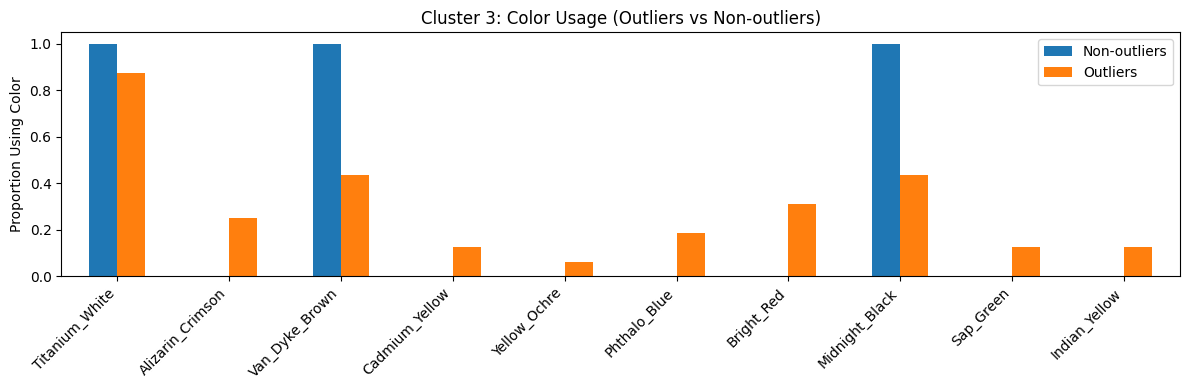

In [26]:
cluster3 = bob_ross["cluster"] == 3

cluster3_out = X_topN[cluster3 & bob_ross["is_outlier"]]
cluster3_non = X_topN[cluster3 & ~bob_ross["is_outlier"]]

cluster3_compare = pd.DataFrame({
    "Non-outliers": cluster3_non.mean(),
    "Outliers": cluster3_out.mean()
})

cluster3_compare.plot(
    kind="bar",
    figsize=(12,4),
    color=["tab:blue", "tab:orange"]
)

plt.title("Cluster 3: Color Usage (Outliers vs Non-outliers)")
plt.ylabel("Proportion Using Color")
plt.xticks(rotation=45, ha="right")
plt.grid(False)
plt.tight_layout()
plt.show()

**Interpretation**

Cluster 3 shows a different pattern. Non-outlier paintings in this cluster consistently use strong core colors such as Titanium White, Van Dyke Brown, and Midnight Black at very high levels. In contrast, outliers use these core colors much less frequently, especially Van Dyke Brown and Midnight Black.

At the same time, outliers show slightly higher use of softer or cooler tones such as Phthalo Blue and Bright Red.


Overall, while both clusters show deviation through changes in emphasis, Cluster 2 outliers reflect tonal shifts within a moderately complex palette, whereas Cluster 3 outliers reflect departures from a more tightly constrained style structure.

### Section 3 - Text feature analysis

#### Step 1: Extract top keywords for each cluster

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

titles = bob_ross["painting_title"]

vectorizer = CountVectorizer(
    stop_words='english',
    ngram_range=(1,1)
)

X_counts = vectorizer.fit_transform(titles)
terms = vectorizer.get_feature_names_out()

In [28]:
results = []

for c in sorted(bob_ross["cluster"].unique()):

    titles = bob_ross[bob_ross["cluster"] == c]["painting_title"]

    X = vectorizer.fit_transform(titles)
    terms = vectorizer.get_feature_names_out()
    counts = np.asarray(X.sum(axis=0)).ravel()

    freq_df = pd.DataFrame({
        "cluster": c,
        "word": terms,
        "count": counts,
    }).sort_values("count", ascending=False).head(10)

    results.append(freq_df)

top10_table = pd.concat(results).reset_index(drop=True)

top10_table

,cluster,word,count
0,1,mountain,38
1,1,oval,16
2,1,autumn,16
3,1,lake,14
4,1,winter,11
5,1,cabin,11
6,1,sunset,11
7,1,waterfall,11
8,1,stream,10
9,1,forest,10


**Interpretation**

The word frequency patterns show clear thematic differences across the three clusters.

Cluster 1 is strongly landscape-oriented. High-frequency words such as mountain, lake, waterfall, stream, forest, and sunset suggest a classic outdoor scenery theme. This aligns with a balanced and traditional nature style, where compositions focus on recognizable landscape elements.

Cluster 2 appears more seasonally focused, especially on winter scenes. Words like winter, snow, snowy, golden, evening, and glow indicate stronger seasonal atmosphere and lighting effects. Compared to Cluster 1, this cluster emphasizes mood and time-of-day variation rather than just structural landscape elements.

Cluster 3 is more restrained and atmospheric. Frequent words such as winter, grey, snow, blossoms, blue, and birch  reflects a simplified and colder visual theme, consistent with its more limited color usage.

#### Step 2: Extract outlier-related keywords

In [29]:
results = []

for c in sorted(bob_ross["cluster"].unique()):

    cluster_data = bob_ross[bob_ross["cluster"] == c]

    out_titles = cluster_data[cluster_data["is_outlier"] == True]["painting_title"]
    non_titles = cluster_data[cluster_data["is_outlier"] == False]["painting_title"]

    if len(out_titles) == 0:
        continue

    X_all = vectorizer.fit_transform(cluster_data["painting_title"])
    terms = vectorizer.get_feature_names_out()

    X_out = vectorizer.transform(out_titles)
    X_non = vectorizer.transform(non_titles)

    mean_out = np.asarray(X_out.mean(axis=0)).ravel()
    mean_non = np.asarray(X_non.mean(axis=0)).ravel()

    diff = mean_out - mean_non

    top_idx = diff.argsort()[-10:][::-1]

    freq_df = pd.DataFrame({
        "cluster": c,
        "word": terms[top_idx],
        "outlier_rate": mean_out[top_idx],
        "non_outlier_rate": mean_non[top_idx],
        "difference": diff[top_idx]
    })

    results.append(freq_df)

outlier_cluster_table = pd.concat(results).reset_index(drop=True)

outlier_cluster_table

,cluster,word,outlier_rate,non_outlier_rate,difference
0,2,golden,0.6000,0.000000,0.600000
1,2,rays,0.2000,0.000000,0.200000
2,2,sunshine,0.2000,0.000000,0.200000
3,2,enchanted,0.2000,0.000000,0.200000
4,2,campfire,0.2000,0.000000,0.200000
5,2,knoll,0.2000,0.000000,0.200000
6,2,glow,0.2000,0.014085,0.185915
7,2,falls,0.2000,0.014085,0.185915
8,2,oval,0.2000,0.056338,0.143662
9,2,quite,0.0000,0.014085,-0.014085


**Interpretation**

For Cluster 2, outliers are strongly associated with words such as golden, rays, sunshine, enchanted, campfire, and glow. These words emphasize warmth, light, and atmospheric brightness. Since these terms rarely appear in non-outliers (often zero frequency), deviation in Cluster 2 seems to occur when paintings shift toward brighter, glowing, or more dramatic lighting themes.

For Cluster 3, outliers are dominated by words like winter, snow, grey, moon, and shades. These terms emphasize cold tones, seasonal intensity, and softer atmospheric elements. This suggests that in Cluster 3, outliers reflect further simplification and stronger focus on winter themes.

Overall, deviation across clusters is structured: Cluster 2 outliers move toward heightened warmth and glow, while Cluster 3 outliers move toward intensified cold and atmospheric minimalism.